<a href="https://colab.research.google.com/github/jryuuu22/heart-disease-project/blob/main/eclipse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kagglehub
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
basketball = kagglehub.dataset_download("wyattowalsh/basketball")

100%|██████████| 697M/697M [00:24<00:00, 30.1MB/s]

Extracting files...


In [3]:
os.listdir(basketball)

['csv', 'nba.sqlite']

In [4]:
csv_path = f"{basketball}/csv"

In [5]:
print(os.listdir(csv_path))

['other_stats.csv', 'game_info.csv', 'team.csv', 'team_details.csv', 'draft_combine_stats.csv', 'officials.csv', 'player.csv', 'team_history.csv', 'game_summary.csv', 'line_score.csv', 'draft_history.csv', 'team_info_common.csv', 'play_by_play.csv', 'game.csv', 'inactive_players.csv', 'common_player_info.csv']


In [6]:
#load dataframe from play_by_play csv
df = pd.read_csv(
    f"{csv_path}/play_by_play.csv", nrows=100000
)

In [7]:
#filter event by free throw
keyword = "Free Throw"
filtered_df = df[
    df[["homedescription", "visitordescription"]]
    .apply(lambda x: x.astype(str).str.contains(keyword, case=False, na=False))
    .any(axis=1)
]

In [8]:
filtered_df.head()

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,...,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag
22,29600012,24,3,11,1,14:54 PM,9:24,NaN,NaN,Cassell Free Throw 1 of 2 (1 PTS),...,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
24,29600012,26,3,12,1,14:54 PM,9:24,NaN,NaN,Cassell Free Throw 2 of 2 (2 PTS),...,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
30,29600012,32,3,11,1,14:56 PM,8:37,Campbell Free Throw 1 of 2 (1 PTS),NaN,NaN,...,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
31,29600012,33,3,12,1,14:56 PM,8:37,MISS Campbell Free Throw 2 of 2,NaN,NaN,...,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0
44,29600012,46,3,11,1,14:58 PM,7:23,NaN,NaN,Person Free Throw 1 of 2 (3 PTS),...,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,0


In [9]:
#Clean dataframe
filtered_df = filtered_df.drop(columns=[
    'neutraldescription', 'video_available_flag',
    'person1type','player1_team_nickname', 'player1_team_abbreviation', 'player1_id', 'player1_name', 'player1_team_city', 'player1_team_id',
    'person2type','player2_team_nickname', 'player2_team_abbreviation', 'player2_id', 'player2_name', 'player2_team_city', 'player2_team_id',
    'person3type','player3_team_nickname', 'player3_team_abbreviation', 'player3_id', 'player3_name', 'player3_team_city', 'player3_team_id'])

In [10]:
filtered_df.head()

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,visitordescription,score,scoremargin
22,29600012,24,3,11,1,14:54 PM,9:24,NaN,Cassell Free Throw 1 of 2 (1 PTS),1 - 4,3
24,29600012,26,3,12,1,14:54 PM,9:24,NaN,Cassell Free Throw 2 of 2 (2 PTS),2 - 4,2
30,29600012,32,3,11,1,14:56 PM,8:37,Campbell Free Throw 1 of 2 (1 PTS),NaN,4 - 5,1
31,29600012,33,3,12,1,14:56 PM,8:37,MISS Campbell Free Throw 2 of 2,NaN,NaN,NaN
44,29600012,46,3,11,1,14:58 PM,7:23,NaN,Person Free Throw 1 of 2 (3 PTS),5 - 9,4


In [11]:
#Create a new column in dataframe where if the description contains word 'miss' than it assigns the value to 0 and if else it assigns the value to 1
keyword = 'MISS'

miss_mask = filtered_df[['homedescription', 'visitordescription']].apply(
    lambda row: row.astype(str).str.contains(keyword, case=False, na=False).any(),
    axis=1
)

filtered_df.loc[:, 'FT_made'] = (~miss_mask).astype(int)

In [12]:
filtered_df.head()

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,visitordescription,score,scoremargin,FT_made
22,29600012,24,3,11,1,14:54 PM,9:24,NaN,Cassell Free Throw 1 of 2 (1 PTS),1 - 4,3,1
24,29600012,26,3,12,1,14:54 PM,9:24,NaN,Cassell Free Throw 2 of 2 (2 PTS),2 - 4,2,1
30,29600012,32,3,11,1,14:56 PM,8:37,Campbell Free Throw 1 of 2 (1 PTS),NaN,4 - 5,1,1
31,29600012,33,3,12,1,14:56 PM,8:37,MISS Campbell Free Throw 2 of 2,NaN,NaN,NaN,0
44,29600012,46,3,11,1,14:58 PM,7:23,NaN,Person Free Throw 1 of 2 (3 PTS),5 - 9,4,1


In [13]:
filtered_df['FT_made'].value_counts()

,count
FT_made,
1,8301
0,3077


In [14]:
def extract_player_name(description):
    """Extract player name from free throw description"""
    if pd.isna(description):
        return None
    # Pattern: "PlayerName Free Throw..." or "MISS PlayerName Free Throw..."
    match = re.search(r'^(?:MISS\s+)?([A-Za-z\.\s]+?)\s+Free Throw', str(description))
    return match.group(1).strip() if match else None

filtered_df['player_name'] = filtered_df.apply(
    lambda row: extract_player_name(row['homedescription']) or extract_player_name(row['visitordescription']),
    axis=1
)
# Convert pctimestring to seconds remaining
def time_to_seconds(time_str):
    """Convert MM:SS to total seconds"""
    if pd.isna(time_str):
        return None
    try:
        parts = str(time_str).split(':')
        return int(parts[0]) * 60 + int(parts[1])
    except:
        return None

filtered_df['seconds_remaining'] = filtered_df['pctimestring'].apply(time_to_seconds)

# Define clutch situations (last 5 minutes of 4th quarter/OT)
filtered_df['is_clutch'] = (
    (filtered_df['period'] >= 4) &
    (filtered_df['seconds_remaining'] <= 300)
).astype(int)

# Parse score margin (convert "71 - 85" to numeric difference)
def parse_score_margin(score_str):
    """Extract point differential from score string"""
    if pd.isna(score_str):
        return None
    try:
        home, away = score_str.split(' - ')
        return abs(int(home) - int(away))
    except:
        return None

filtered_df['point_differential'] = filtered_df['score'].apply(parse_score_margin)

# High pressure = clutch time AND close game (within 5 points)
filtered_df['high_pressure'] = (
    (filtered_df['is_clutch'] == 1) &
    (filtered_df['point_differential'] <= 5)
).astype(int)

In [15]:
# Group by player to calculate baseline statistics
player_stats = filtered_df.groupby('player_name').agg({
    'FT_made': ['sum', 'count', 'mean'],
    'is_clutch': 'sum',
    'high_pressure': 'sum'
}).reset_index()

player_stats.columns = ['player_name', 'ft_made_total', 'ft_attempts', 'overall_ft_pct',
                        'clutch_attempts', 'high_pressure_attempts']

# Calculate clutch-specific performance
clutch_stats = filtered_df[filtered_df['is_clutch'] == 1].groupby('player_name').agg({
    'FT_made': 'mean'
}).reset_index()
clutch_stats.columns = ['player_name', 'clutch_ft_pct']

high_pressure_stats = filtered_df[filtered_df['high_pressure'] == 1].groupby('player_name').agg({
    'FT_made': 'mean'
}).reset_index()
high_pressure_stats.columns = ['player_name', 'high_pressure_ft_pct']

# Merge all player statistics
player_stats = player_stats.merge(clutch_stats, on='player_name', how='left')
player_stats = player_stats.merge(high_pressure_stats, on='player_name', how='left')

# Calculate "clutch factor" = clutch FT% - overall FT%
player_stats['clutch_factor'] = player_stats['clutch_ft_pct'] - player_stats['overall_ft_pct']

# Filter for players with meaningful sample size (e.g., at least 20 FT attempts)
player_stats_filtered = player_stats[player_stats['ft_attempts'] >= 20]

print(f"Players with 20+ FT attempts: {len(player_stats_filtered)}")
player_stats_filtered.sort_values('clutch_factor', ascending=False).head(10)

Players with 20+ FT attempts: 173


,player_name,ft_made_total,ft_attempts,overall_ft_pct,clutch_attempts,high_pressure_attempts,clutch_ft_pct,high_pressure_ft_pct,clutch_factor
156,Mashburn,13,22,0.590909,4,4,1.000000,1.0,0.409091
66,Divac,24,38,0.631579,3,0,1.000000,NaN,0.368421
100,Green,25,38,0.657895,2,0,1.000000,NaN,0.342105
266,Vaughn,16,24,0.666667,2,0,1.000000,NaN,0.333333
267,Vaught,22,33,0.666667,2,0,1.000000,NaN,0.333333
98,Goldwire,19,26,0.730769,7,4,1.000000,1.0,0.269231
204,Perkins,37,50,0.740000,2,2,1.000000,1.0,0.260000
60,Davis,49,81,0.604938,22,2,0.863636,1.0,0.258698
38,Campbell,48,63,0.761905,8,4,1.000000,1.0,0.238095
91,Garnett,30,44,0.681818,10,5,0.900000,1.0,0.218182


In [16]:
player_stats_filtered.sort_values('clutch_factor').head()

,player_name,ft_made_total,ft_attempts,overall_ft_pct,clutch_attempts,high_pressure_attempts,clutch_ft_pct,high_pressure_ft_pct,clutch_factor
7,Askew,21,28,0.750000,2,0,0.000000,NaN,-0.750000
276,Wesley,16,24,0.666667,2,0,0.000000,NaN,-0.666667
277,West,22,29,0.758621,3,1,0.333333,1.0,-0.425287
235,Russell,28,41,0.682927,3,0,0.333333,NaN,-0.349593
150,Maloney,20,29,0.689655,10,1,0.400000,1.0,-0.289655


In [17]:
#Compute Season Ft% for each player
season_ft = (
    filtered_df.groupby('player_name')['FT_made']
    .mean()
    .reset_index()
    .rename(columns={'FT_made': 'season_FT_pct'})
)

In [18]:
#merge it back into main DF
filtered_df = filtered_df.merge(season_ft, on='player_name', how='left')

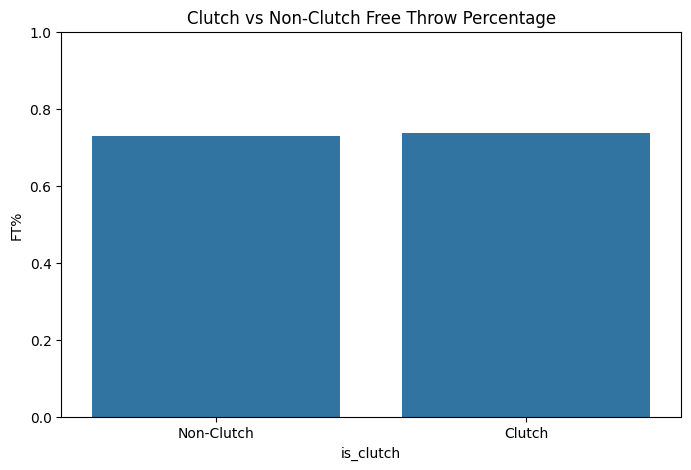

In [19]:
#Cluth vs Non-Clutch FT%
clutch_ft = filtered_df.groupby('is_clutch')['FT_made'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=clutch_ft, x='is_clutch', y='FT_made')
plt.title("Clutch vs Non-Clutch Free Throw Percentage")
plt.xticks([0,1], ['Non-Clutch', 'Clutch'])
plt.ylabel("FT%")
plt.ylim(0, 1)
plt.show()

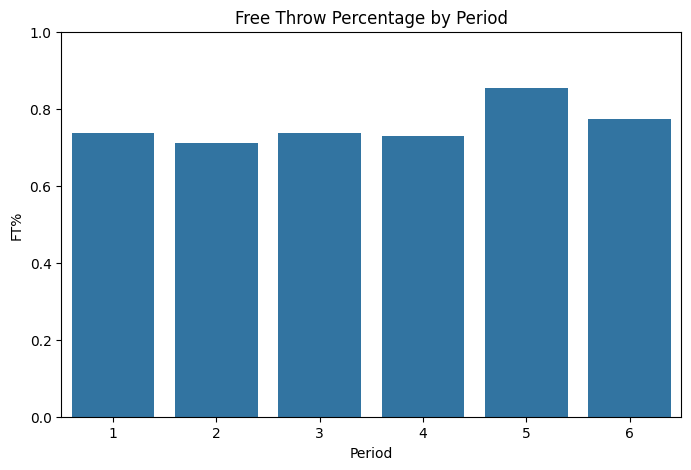

In [20]:
period_ft = filtered_df.groupby('period')['FT_made'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=period_ft, x='period', y='FT_made')
plt.title("Free Throw Percentage by Period")
plt.ylabel("FT%")
plt.xlabel("Period")
plt.ylim(0, 1)
plt.show()

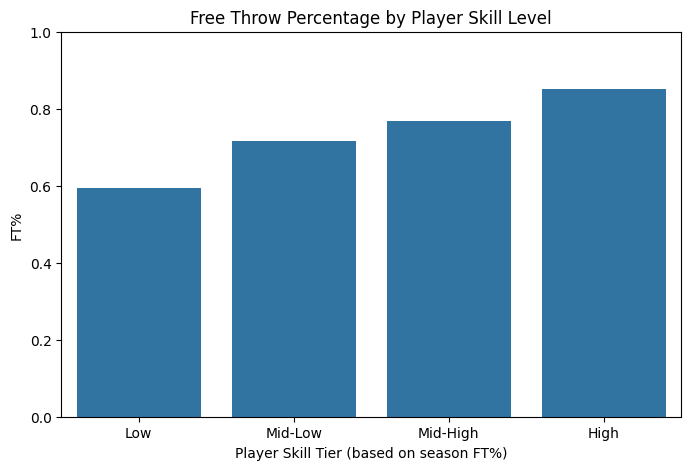

In [21]:
df_skill = filtered_df.dropna(subset=['season_FT_pct']).copy()

# Create skill tier buckets using quartiles
df_skill['skill_bucket'] = pd.qcut(
    df_skill['season_FT_pct'],
    q=4,
    labels=['Low', 'Mid-Low', 'Mid-High', 'High']
)

# Compute FT% within each bucket
skill_ft = (
    df_skill.groupby('skill_bucket',observed=True)['FT_made']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=skill_ft, x='skill_bucket', y='FT_made')

plt.title("Free Throw Percentage by Player Skill Level")
plt.xlabel("Player Skill Tier (based on season FT%)")
plt.ylabel("FT%")
plt.ylim(0, 1)

plt.show()

In [22]:
filtered_df = filtered_df.merge(
    player_stats[['player_name', 'overall_ft_pct', 'clutch_ft_pct', 'clutch_factor']],
    on='player_name',
    how='left'
)

print("Added player stats to main dataframe")
print(f"Shape: {filtered_df.shape}")
filtered_df[['player_name', 'overall_ft_pct', 'clutch_ft_pct', 'FT_made']].head()

Added player stats to main dataframe
Shape: (11378, 21)


,player_name,overall_ft_pct,clutch_ft_pct,FT_made
0,Cassell,0.883333,0.888889,1
1,Cassell,0.883333,0.888889,1
2,Campbell,0.761905,1.000000,1
3,Campbell,0.761905,1.000000,0
4,Person,0.850000,1.000000,1


In [23]:
filtered_df['close_game'] = (filtered_df['point_differential'] <= 3).astype(int)

print("Close game distribution:")
print(filtered_df['close_game'].value_counts())

Close game distribution:
close_game
0    8951
1    2427
Name: count, dtype: int64


In [24]:
filtered_df['late_game'] = (filtered_df['period'] >= 4).astype(int)

print("Late game distribution:")
print(filtered_df['late_game'].value_counts())

Late game distribution:
late_game
0    7661
1    3717
Name: count, dtype: int64


Pressure score distribution:
pressure_score
0    5564
1    3841
2    1747
3     226
Name: count, dtype: int64


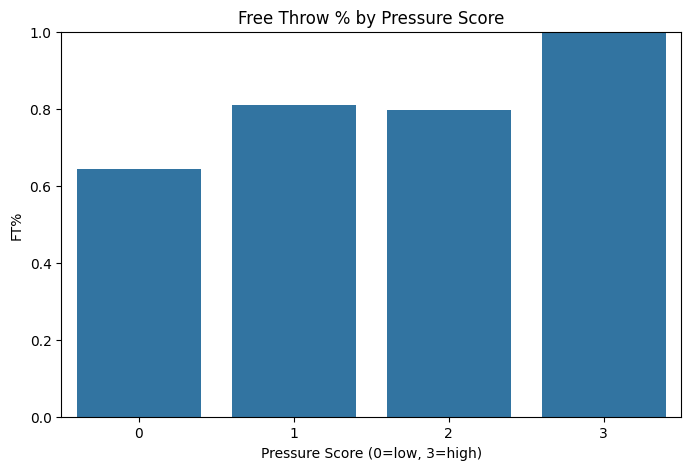

In [25]:
filtered_df['pressure_score'] = (
    filtered_df['is_clutch'].astype(int) +
    filtered_df['close_game'].astype(int) +
    (filtered_df['seconds_remaining'] <= 120).astype(int)
)
# Score of 3 = clutch time + close game + under 2 minutes (maximum pressure)
# Score of 0 = none of these factors (low pressure)
print("Pressure score distribution:")
print(filtered_df['pressure_score'].value_counts().sort_index())
pressure_performance = filtered_df.groupby('pressure_score')['FT_made'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(data=pressure_performance, x='pressure_score', y='FT_made')
plt.title("Free Throw % by Pressure Score")
plt.xlabel("Pressure Score (0=low, 3=high)")
plt.ylabel("FT%")
plt.ylim(0, 1)
plt.show()


In [26]:
career_attempts = filtered_df.groupby('player_name').size().to_dict()
filtered_df['career_attempts_so_far'] = filtered_df['player_name'].map(career_attempts)

print(f"Career attempts range: {filtered_df['career_attempts_so_far'].min()} to {filtered_df['career_attempts_so_far'].max()}")


Career attempts range: 1.0 to 194.0


In [33]:
# Get the unique game IDS
game_ids = df['game_id'].unique()

# Split game_ids into train and test
train_games, test_games = train_test_split(game_ids, test_size=0.2, shuffle=False)

train_mask = filtered_df['game_id'].isin(train_games)
test_mask = filtered_df['game_id'].isin(test_games)

X_train = X[train_mask].copy()
X_test  = X[test_mask].copy()
y_train = y[train_mask].copy()
y_test  = y[test_mask].copy()

# Scale with StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

# Save CSVs
X_train_scaled.to_csv("X_train.csv", index=False)
X_test_scaled.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

ValueError: could not convert string to float: '14:54 PM'